In [1]:
import copy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets
from gaslight.grid import Grid
from synthesizer.line import (
    get_bpt_kewley01, 
    get_bpt_kauffman03,
    get_diagram_labels,)
from synthesizer import line_ratios

In [2]:

grid_dir = '/Users/sw376/Dropbox/Research/data/gaslight/grids'

grid_name = 'bpass-2.2.1-bin_chabrier03-0.1,300.0-ages:6.,7.,8.-c23.01-full'
sps_g = Grid(grid_dir=grid_dir, grid_name=grid_name)

grid_name = 'agnsed-limited-c23.01-agn-limited'
agn_g = Grid(grid_dir=grid_dir, grid_name=grid_name)

Here we plot all models, colour-coded by metallicity

/var/folders/1r/dyc06cz53k1g87b17q09by98000ft2/T/ipykernel_10113/1347804928.py:29: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(x), np.log10(y), s=1, alpha=0.2, c=c)
/var/folders/1r/dyc06cz53k1g87b17q09by98000ft2/T/ipykernel_10113/1347804928.py:23: RuntimeWarning: divide by zero encountered in divide
  x = np.sum([g.luminosity[_line].flatten() for _line in a], axis=0) / np.sum([g.luminosity[_line].flatten() for _line in b], axis=0)
/var/folders/1r/dyc06cz53k1g87b17q09by98000ft2/T/ipykernel_10113/1347804928.py:23: RuntimeWarning: invalid value encountered in divide
  x = np.sum([g.luminosity[_line].flatten() for _line in a], axis=0) / np.sum([g.luminosity[_line].flatten() for _line in b], axis=0)
/var/folders/1r/dyc06cz53k1g87b17q09by98000ft2/T/ipykernel_10113/1347804928.py:27: RuntimeWarning: divide by zero encountered in divide
  y = np.sum([g.luminosity[_line].flatten() for _line in a], axis=0) / np.sum([g.luminosity[_line].flatten() for _line in b], axi

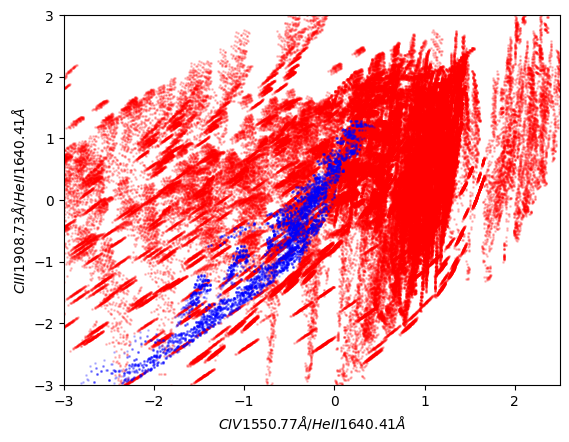

In [3]:
diagram_id = 'BPT-NII'
diagram_id = 'C4C3'

lines_ids = line_ratios.diagrams[diagram_id]


if diagram_id == 'BPT-NII':
    # plot Kewley and Kauffmann lines if BPT
    for f, ls, limit, label in zip([get_bpt_kewley01, get_bpt_kauffman03],
                                ['-', '--'],
                                [0.47, 0.05],
                                ['Kewley+2001', 'Kauffman+2003']):
        log10x = np.arange(-5., limit, 0.01)
        plt.plot(log10x, f(log10x), ls=ls, lw=1, c='k', alpha=0.3, label=label)




for g, c in zip([sps_g, agn_g], ['r', 'b']):

    # x
    a, b = lines_ids[0]
    x = np.sum([g.luminosity[_line].flatten() for _line in a], axis=0) / np.sum([g.luminosity[_line].flatten() for _line in b], axis=0)

    # y
    a, b = lines_ids[1]
    y = np.sum([g.luminosity[_line].flatten() for _line in a], axis=0) / np.sum([g.luminosity[_line].flatten() for _line in b], axis=0)

    plt.scatter(np.log10(x), np.log10(y), s=1, alpha=0.2, c=c)


if diagram_id in line_ratios.diagram_limits:
    xlim, ylim = line_ratios.diagram_limits[diagram_id]
else:
    xlim = [-5., 1.5]
    ylim = [-3., 1.5]

plt.xlim(xlim)
plt.ylim(ylim)

x_label, y_label = get_diagram_labels(diagram_id)

# add axes labels
plt.xlabel(rf'${x_label}$')
plt.ylabel(rf'${y_label}$')

# show
plt.show()
